# 19절. SymPy로 공부하는 미분과 적분

## 변수와 함수

- 변수 : 어떤 숫자를 대표하는 기호
- 함수 :  수식등을 사용하여 입력받은 변수를 다른 값 즉, 출력 변수로 바꾸어 출력하는 관계(relationship) 혹은 구조
- 역함수(inverse function) : 입력과 출력 관계와 정반대의 입출력 관계를 가지는 함수

## 함수의 그래프

$f(x) = x^3 - 3x^2 + x$

In [2]:
import numpy as np

In [14]:
def f(x):
    return x**3 - 3*x**2 + x

In [15]:
x = np.linspace(-1, 3, 9)

x 는 -1 부터 3까지 0.5 간격으로 9개의 점을 찍음

In [16]:
y = f(x)
y

array([-5.   , -1.375,  0.   , -0.125, -1.   , -1.875, -2.   , -0.625,  3.   ])

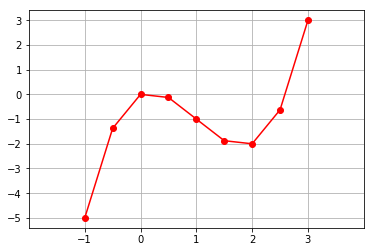

In [17]:
import matplotlib.pylab as plt

plt.plot(x, y, 'ro-')

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.grid()
plt.show()

좀 더 조일하게 만들면 곡선이 된다. 

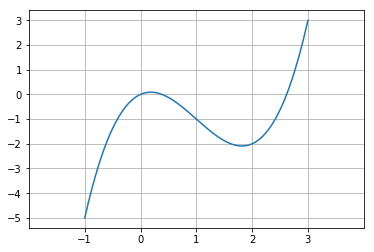

In [18]:
x = np.linspace(-1, 3, 400)
y = f(x)
plt.plot(x, y)

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.grid()
plt.show()

## 기울기

입력변수의 변화에 따른 출력변수의 변화를 비율

$\text{기울기} =  \dfrac{\text{접선이 $y$ 방향으로 이동한 거리}}{\text{접선이 $x$ 방향으로 이동한 거리}}$


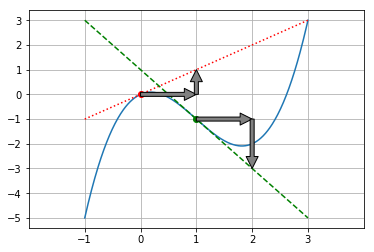

In [19]:
plt.plot(x, y)
plt.plot(0, 0, 'ro'); plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go'); plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.grid()
plt.show()

## 데이터 분석에서 많이 사용되는 함수들


### 다항식 함수
수항  c0 , 일차항  c1x , 이차항  c2x2 ,  ⋯⋯  등의 거듭제곱 항의 합으로 이루어진 함수

### 지수 함수
밑(base)를 오일러 수  ee (약 2.718)로 하는 지수 함수 <br>
$y = e^x$ <br>
$y = \exp x$

* 특성 
    - 양수를 거듭제곱한 값이므로 음수가 될 수 없다.
    - x=0x=0 일 때 1이 된다.
    - xx 가 양의 무한대로 가면( x→∞ x→∞ ), 양의 무한대로 다가간다.
    - xx 가 음의 무한대로 가면( x→−∞ x→−∞ ), 0으로 다가간다.
    
  밑이  e 가 아닌 경우에는 다음과 같이 변형하여 사용

In [20]:
np.e

2.718281828459045

In [22]:
def f_exp(x):
    return np.e ** x

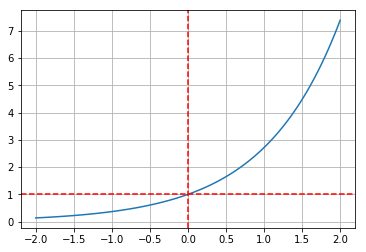

In [24]:
xx = np.linspace(-2, 2, 100)
yy = f_exp(xx)
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.grid()
plt.show()

## 로그 함수

지수 함수의 역함수: 자연로그(natural log) 함수

$y = \log x$

* 특징 
    - x 값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
    - x>1  이면 양수가 된다.
    - x=1 일 때  y=0 이 된다.
    - x<1  이면 음수가 된다.

In [25]:
def f_log(x):
    return np.log(x)

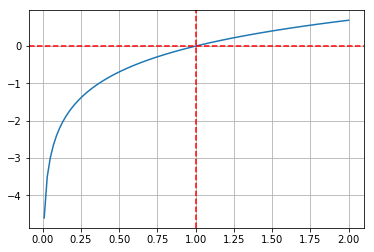

In [26]:
xx = np.linspace(0.01, 2, 100)
yy = f_log(xx)
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.grid()
plt.show()

### 로그 함수의 성질 1: 로그 함수는 곱하기를 더하기로 변환
### 로그 함수의 성질 2: 로그 함수를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않음


In [30]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

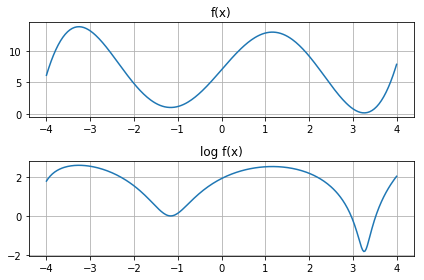

In [32]:
xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)
plt.plot(xx, yy)
plt.title("f(x)")
plt.grid()

plt.subplot(212)
plt.plot(xx, np.log(yy))
plt.title("log f(x)")

plt.tight_layout()
plt.grid()
plt.show()

### 로그 함수의 성질 3: 로그 함수는 0부터 1사이의 작은 값을 확대시켜 보여줌

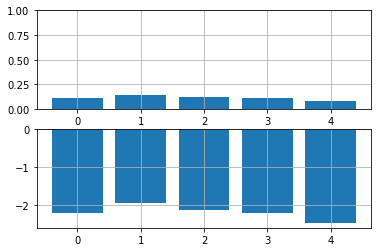

In [33]:
np.random.seed(0)
x = np.random.rand(5) * 0.2

plt.subplot(211)
plt.bar(range(5), x)
plt.ylim(0, 1)
plt.grid()

plt.subplot(212)
plt.bar(range(5), np.log(x))
plt.grid()

plt.show()

# SymPy를 사용한 함수 미분

## 미분 
원래 함수의 기울기(slope) = 도함수(derivative)

## 미분 공식

### 기본 미분 공식

* 상수
    - 상수를 미분하면 0이 된다.

* 거듭제곱
    - x 의  n  제곱을 미분하면  n−1  제곱으로 제곱수가 1씩 감소한다. 이 공식은  n 이 자연수이거나 음의 정수일 때 성립한다.  n=0 일 때는 성립하지 않는다.

* 로그
    - 로그함수를 미분하면  $x^{-1}$ 이 된다.

* 지수
    - 밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.
     
### 선형 조합

어떤 함수에 각각 상수를 곱한 후 더한 값(선형 조합)은 각 함수의 도함수를 선형 조합한 것과 같다.


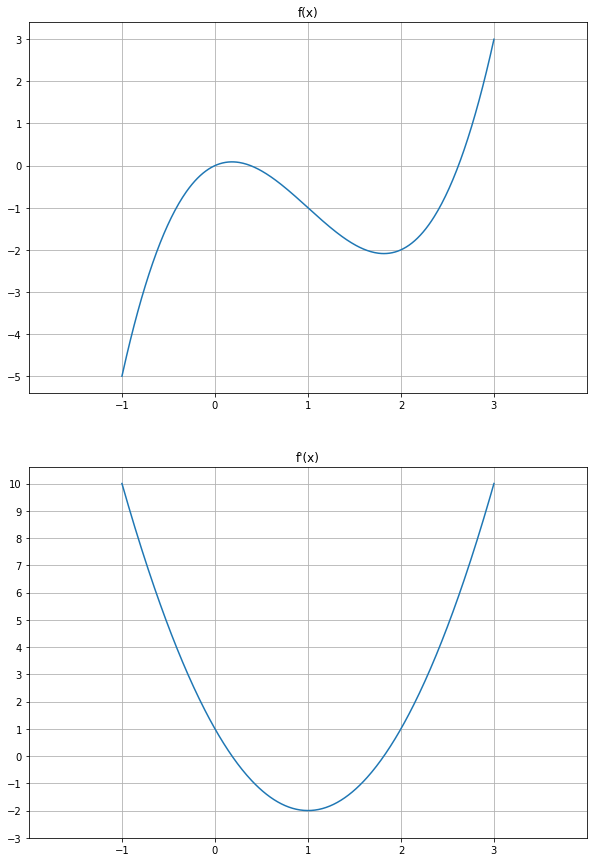

In [34]:
def f(x):
    return x**3 - 3*x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.grid()

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.grid()

plt.show()

### 곱셈 법칙

각 개별 함수의 도함수를 더한 값과 같다. 

$f = x \cdot \exp(x)$ -->  $\dfrac{df}{dx} = \exp(x) + x \exp(x)$ 


### 연쇄 법칙

미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용

$f = \exp \dfrac{(x-\mu)^2}{\sigma^2}$

함수를 나누면 

$f = \exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2}   \;,\;\;\;\;   y = x-\mu$

연쇄 법칙을 적용하면 

$\dfrac{df}{dx} = \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx}$

결과   

$\dfrac{df}{dx} =  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}$ 

## 2차 도함수

도함수를 한 번 더 미분하여 만들어진 함수를 2차 도함수(second derivative)

2차 도함수 값이 양수인 경우를 볼록(convex) <br>
2차 도함수 값이 음수인 경우를 오목(concave)


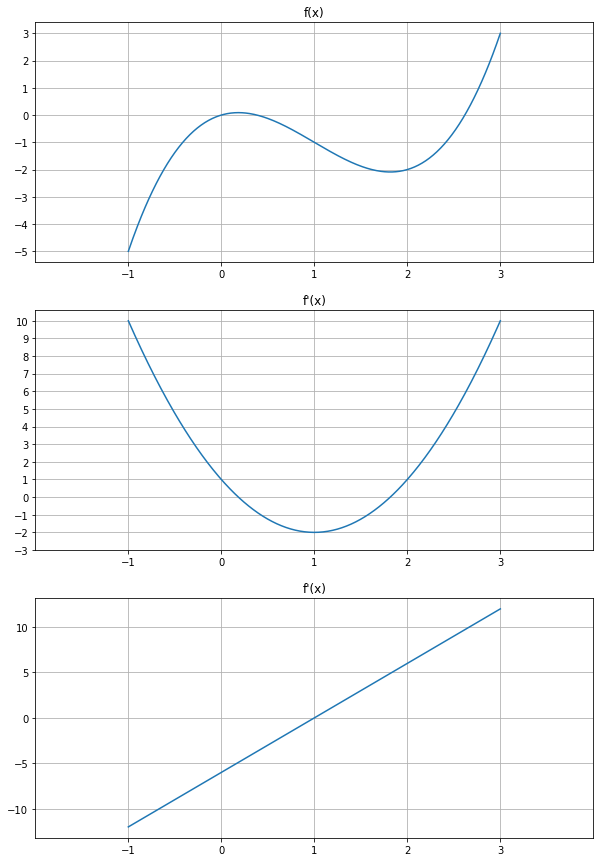

In [36]:
def f(x):
    return x**3 - 3*x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

def fprime2(x):
    return 6*x - 6

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.grid()

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.grid()

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f'(x)")
plt.grid()

plt.show()

## 편미분

다변수 함수인 경우에도 편미분의 결과로 하나의 함수에 대해 여러 개의 도함수가 나온다. <br>
변수가 하나인 함수의 미분과 같음

$f(x,y) = x^2 + 4xy + 4y^2$

x 에 대해서 미분한값

$f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y$ 

y 에 대해서 미분한값

$f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y$


## SymPy

사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산



In [37]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')  

In [38]:
x = sympy.symbols('x')
x

x

In [39]:
type(x)

sympy.core.symbol.Symbol

In [40]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

미분 

In [41]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

소인수분해

In [43]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [45]:
x, y = sympy.symbols('x y')
f = x ** 2 + x * y + y ** 2
f

 2          2
x  + x⋅y + y 

In [46]:
sympy.diff(f, x)

2⋅x + y

In [47]:
sympy.diff(f, y)

x + 2⋅y

In [48]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x-mu)**2/sigma**2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [49]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [50]:
sympy.simplify(sympy.diff(f,x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

# 적분 

## 부정적분

반-미분(anti-derivative) : 도함수  f(x) 를 보고 미분되기 전의 원래의 함수를 찾는 과정(integration), 또는 그 결과(integral)

integrate 명령

In [51]:
import sympy

sympy.init_printing(use_latex='mathjax')

In [52]:
x = sympy.symbols('x')
f = x * sympy.exp(x) + sympy.exp(x)
f

   x    x
x⋅ℯ  + ℯ 

In [53]:
sympy.integrate(f)

   x
x⋅ℯ 

In [54]:
x, y = sympy.symbols('x y')
f = 2 * x + y
f

2⋅x + y

In [55]:
sympy.integrate(f,x)

 2      
x  + x⋅y

### 정적분

독립변수 x 가 어떤 구간 [a,b]  사이일 때 그 구간에서 함수  f(x) 의 값고 수평선(x 축)이 이루는 면적

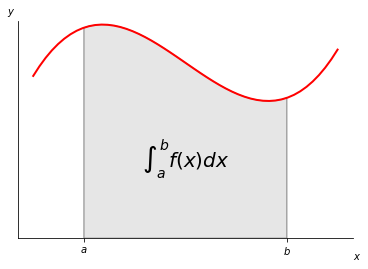

In [56]:
from matplotlib.patches import Polygon

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

a, b = 0, 2

x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)

plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

미적분학의 기본 정리(Fundamental Theorem of Calculus) : 대부분 부정적분으로 구한 함수 F(x) 를 이용하여 구함 

$\int_{b}^{a} f(x) dx = F(a) - F(b)$

In [58]:
x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
# 부정적분
F = sympy.integrate(f)

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [59]:
# 2 ~ 0 까지 넓이
(F.subs(x, 2) - F.subs(x, 0)).evalf()

10.0000000000000

In [65]:
# 정적분
import scipy.integrate 

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

scipy.integrate.quad(f, 0, 2)

(10.0, 1.1102230246251565e-13)

두번째 숫자는 오차의 상한값을

In [67]:
type(scipy.integrate)

module

In [69]:
type(scipy)

module

In [68]:
type(scipy.integrate.quad)

function

## 다변수 정적분

입력 변수가 2개인 2차원 함수

### 하나의 변수로 적분하는 경우

하나의 변수만 진짜 입력 변수로 보고 나머지 하나는 단순히 정해지지 않은 상수로 보는 방법



### 두 변수롤 적분하는 경우